# ANALYSIS OF GLOBAL SUPERSTORE TRANSACTIONS

### Importing the necessary modules for the analysis 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
from matplotlib import pyplot as plt
sbn.set(style = 'whitegrid')

In [3]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 19.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
data = pd.read_excel('global superstore.xlsx')
data

,category,city,country,customer_name,discount,market_1,order_date,month,order_priority,product_name,...,quantity,region,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,market_2
0,Office Supplies,Los Angeles,United States,Lycoris Saunders,0.0,US,2011-01-07,Jan,High,Xerox 225,...,3,West,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,North America
1,Office Supplies,Los Angeles,United States,Mark Van Huff,0.0,US,2011-01-21,Jan,Medium,"Wirebound Service Call Books, 5 1/2"" x 4""",...,2,West,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,North America
2,Office Supplies,Los Angeles,United States,Chad Sievert,0.0,US,2011-08-05,Aug,Medium,"Adams Phone Message Book, Professional, 400 Me...",...,3,West,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,North America
3,Office Supplies,Los Angeles,United States,Chad Sievert,0.0,US,2011-08-05,Aug,Medium,Xerox 1913,...,2,West,111,Consumer,2011-08-09,Standard Class,4.59,California,Paper,North America
4,Office Supplies,Los Angeles,United States,Arthur Prichep,0.0,US,2011-09-29,Sep,High,Xerox 223,...,1,West,6,Consumer,2011-10-03,Standard Class,1.32,California,Paper,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,Allen Armold,0.2,US,2011-04-21,Apr,Medium,ACCOHIDE Binder by Acco,...,5,West,17,Consumer,2011-04-25,Standard Class,0.97,California,Binders,North America
51286,Office Supplies,Los Angeles,United States,Aleksandra Gannaway,0.2,US,2011-04-26,Apr,Low,"Acco Pressboard Covers with Storage Hooks, 14 ...",...,6,West,18,Corporate,2011-05-03,Standard Class,1.54,California,Binders,North America
51287,Office Supplies,Los Angeles,United States,Harold Pawlan,0.2,US,2011-05-06,May,Medium,Wilson Jones Legal Size Ring Binders,...,8,West,141,Home Office,2011-05-10,Standard Class,12.51,California,Binders,North America
51288,Office Supplies,Los Angeles,United States,Brosina Hoffman,0.2,US,2011-06-09,Jun,Medium,DXL Angle-View Binders with Locking Rings by S...,...,3,West,19,Consumer,2011-06-14,Standard Class,1.19,California,Binders,North America


### DATA WRANGLING AND EXPLORATORY DATA ANALYSIS

In [11]:
data.isnull().sum()

category          0
city              0
country           0
customer_name     0
discount          0
market_1          0
order_date        0
month             0
order_priority    0
product_name      0
profit            0
quantity          0
region            0
sales             0
segment           0
ship_date         0
ship_mode         0
shipping_cost     0
state             0
sub_category      0
market_2          0
dtype: int64

In [23]:
data.dtypes

category                  object
city                      object
country                   object
customer_name             object
discount                 float64
market_1                  object
order_date        datetime64[ns]
month                     object
order_priority            object
product_name              object
profit                   float64
quantity                   int64
region                    object
sales                      int64
segment                   object
ship_date         datetime64[ns]
ship_mode                 object
shipping_cost            float64
state                     object
sub_category              object
dtype: object

In [6]:
data.columns

Index(['category', 'city', 'country', 'customer_name', 'discount', 'market_1',
       'order_date', 'month', 'order_priority', 'product_name', 'profit',
       'quantity', 'region', 'sales', 'segment', 'ship_date', 'ship_mode',
       'shipping_cost', 'state', 'sub_category', 'market_2'],
      dtype='object')

In [7]:
data.drop(['market_2'], axis = 1, inplace = True)

In [21]:
data['order_date'] = pd.to_datetime(data['order_date'])
data['ship_date'] = pd.to_datetime(data['ship_date'])

In [25]:
data['order_year'] = data['order_date'].dt.year

In [27]:
data.dropna()

,category,city,country,customer_name,discount,market_1,order_date,month,order_priority,product_name,...,quantity,region,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,order_year
0,Office Supplies,Los Angeles,United States,Lycoris Saunders,0.0,US,2011-01-07,Jan,High,Xerox 225,...,3,West,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,2011
1,Office Supplies,Los Angeles,United States,Mark Van Huff,0.0,US,2011-01-21,Jan,Medium,"Wirebound Service Call Books, 5 1/2"" x 4""",...,2,West,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,2011
2,Office Supplies,Los Angeles,United States,Chad Sievert,0.0,US,2011-08-05,Aug,Medium,"Adams Phone Message Book, Professional, 400 Me...",...,3,West,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,2011
3,Office Supplies,Los Angeles,United States,Chad Sievert,0.0,US,2011-08-05,Aug,Medium,Xerox 1913,...,2,West,111,Consumer,2011-08-09,Standard Class,4.59,California,Paper,2011
4,Office Supplies,Los Angeles,United States,Arthur Prichep,0.0,US,2011-09-29,Sep,High,Xerox 223,...,1,West,6,Consumer,2011-10-03,Standard Class,1.32,California,Paper,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,Allen Armold,0.2,US,2011-04-21,Apr,Medium,ACCOHIDE Binder by Acco,...,5,West,17,Consumer,2011-04-25,Standard Class,0.97,California,Binders,2011
51286,Office Supplies,Los Angeles,United States,Aleksandra Gannaway,0.2,US,2011-04-26,Apr,Low,"Acco Pressboard Covers with Storage Hooks, 14 ...",...,6,West,18,Corporate,2011-05-03,Standard Class,1.54,California,Binders,2011
51287,Office Supplies,Los Angeles,United States,Harold Pawlan,0.2,US,2011-05-06,May,Medium,Wilson Jones Legal Size Ring Binders,...,8,West,141,Home Office,2011-05-10,Standard Class,12.51,California,Binders,2011
51288,Office Supplies,Los Angeles,United States,Brosina Hoffman,0.2,US,2011-06-09,Jun,Medium,DXL Angle-View Binders with Locking Rings by S...,...,3,West,19,Consumer,2011-06-14,Standard Class,1.19,California,Binders,2011


In [37]:
# Statistical analysis
numerical_data = data[['profit', 'quantity', 'region', 'sales', 'shipping_cost']]
numerical_data.describe().reset_index()

,index,profit,quantity,sales,shipping_cost
0,count,51290.000000,51290.000000,51290.000000,51290.000000
1,mean,28.610982,3.476545,246.498440,26.375818
2,std,174.340972,2.278766,487.567175,57.296810
3,min,-6599.978000,1.000000,0.000000,0.002000
4,25%,0.000000,2.000000,31.000000,2.610000
5,50%,9.240000,3.000000,85.000000,7.790000
6,75%,36.810000,5.000000,251.000000,24.450000
7,max,8399.976000,14.000000,22638.000000,933.570000


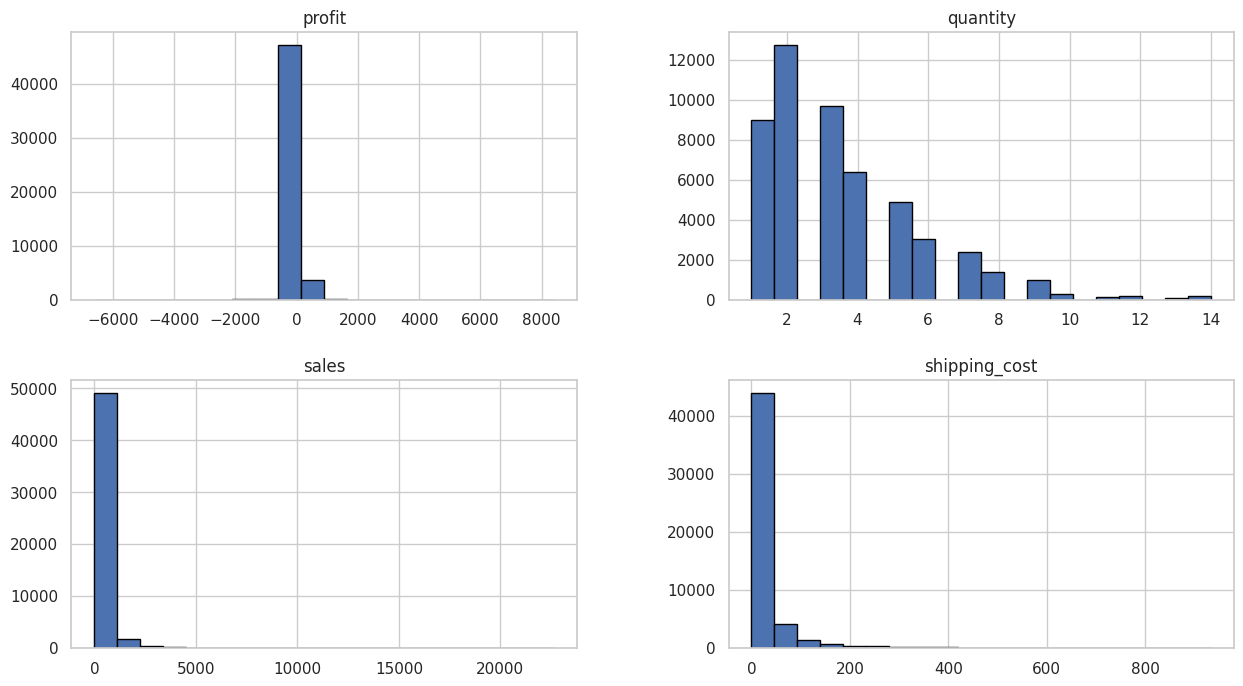

In [178]:
numerical_data.hist(bins = 20, figsize =(15,8), edgecolor = 'black')
plt.show()

In [63]:
year_order = data.groupby('order_year')[['sales', 'profit']].sum().reset_index().round(2)
year_order

,order_year,sales,profit
0,2011,2259511,248940.81
1,2012,2677493,307415.28
2,2013,3405860,406935.23
3,2014,4300041,504165.97


In [73]:
year_order['percentage_sales_increase'] = year_order['sales'].pct_change().fillna(0).round(2)
year_order['percentage_profit_increase'] = year_order['profit'].pct_change().fillna(0).round(2)
year_order

,order_year,sales,profit,percentage_sales_increase,percentage_profit_increase
0,2011,2259511,248940.81,0.00,0.00
1,2012,2677493,307415.28,0.18,0.23
2,2013,3405860,406935.23,0.27,0.32
3,2014,4300041,504165.97,0.26,0.24


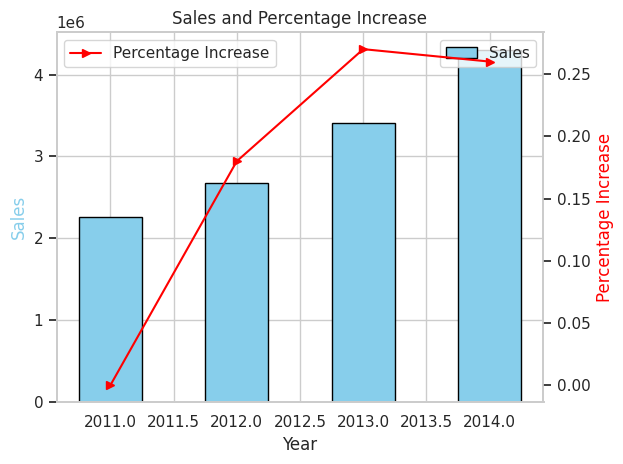

In [176]:
fig, ax1 = plt.subplots()
ax1.bar(year_order['order_year'], year_order['sales'], color = 'skyblue', label = 'Sales', edgecolor = 'black', 
    width = 0.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales', color = 'skyblue')

ax2 = ax1.twinx()
ax2.plot(year_order['order_year'], year_order['percentage_sales_increase'], color = 'red', marker = '>',
     label = 'Percentage Increase')
ax2.set_ylabel('Percentage Increase', color = 'red')

plt.title('Sales and Percentage Increase')
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper left')

plt.tight_layout()
plt.grid(False)
plt.show()

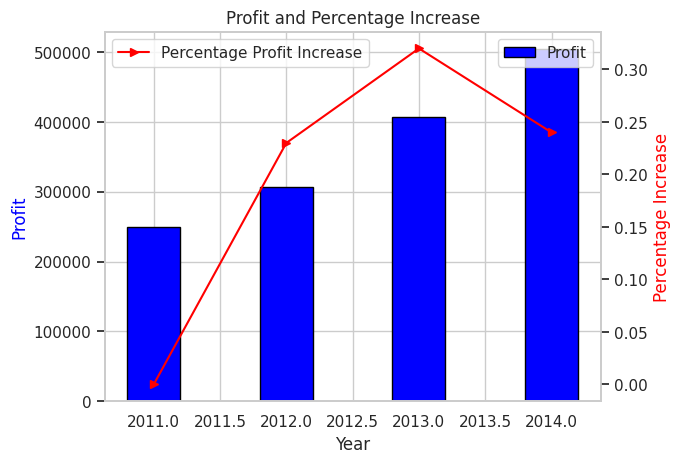

In [174]:
fig, ax1 = plt.subplots()
ax1.bar(year_order['order_year'], year_order['profit'], color = 'blue', label = 'Profit', edgecolor = 'black', 
    width = 0.4)
ax1.set_xlabel('Year')
ax1.set_ylabel('Profit', color = 'blue')
ax1.set_title('Profit and Percentage Increase')

ax2 = ax1.twinx()
ax2.plot(year_order['order_year'], year_order['percentage_profit_increase'], color = 'red', 
    marker = '>', label = 'Percentage Profit Increase')
ax2.set_ylabel('Percentage Increase', color = 'red')

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper left')

plt.grid(False)
plt.show()

In [101]:
data.head(3)

,category,city,country,customer_name,discount,market_1,order_date,month,order_priority,product_name,...,quantity,region,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,order_year
0,Office Supplies,Los Angeles,United States,Lycoris Saunders,0.0,US,2011-01-07,Jan,High,Xerox 225,...,3,West,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,2011
1,Office Supplies,Los Angeles,United States,Mark Van Huff,0.0,US,2011-01-21,Jan,Medium,"Wirebound Service Call Books, 5 1/2"" x 4""",...,2,West,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,2011
2,Office Supplies,Los Angeles,United States,Chad Sievert,0.0,US,2011-08-05,Aug,Medium,"Adams Phone Message Book, Professional, 400 Me...",...,3,West,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,2011


In [103]:
data['category'].nunique()

3

In [107]:
category_sales = data.groupby('category')['sales'].sum().reset_index(name = 'total_sales')
category_sales

,category,total_sales
0,Furniture,4110884
1,Office Supplies,3787330
2,Technology,4744691


In [148]:
category_sales['percentage_sales'] = (category_sales['total_sales']/sum(category_sales['total_sales']) * 100).round(2)
category_sales

,category,total_sales,percentage_sales
0,Furniture,4110884,32.52
1,Office Supplies,3787330,29.96
2,Technology,4744691,37.53


In [146]:
category_sales.drop('percentage_contribution', axis = 1, inplace = True)

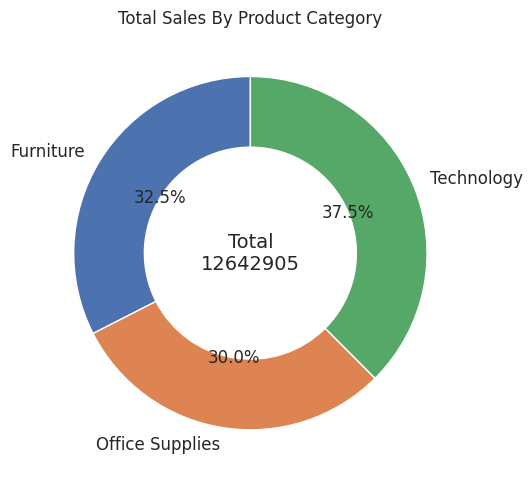

In [144]:
total = sum(category_sales['total_sales'])
plt.figure(figsize = (8,5))
plt.pie(category_sales['percentage_sales'], labels = category_sales['category'], autopct = '%1.1f%%',
    startangle = 90, wedgeprops = {'width': 0.4}, textprops = {'fontsize': 12})
plt.text(0,0,f"Total\n{total}", ha = 'center', va = 'center', fontsize = 14)
plt.title('Total Sales By Product Category')
plt.tight_layout()
plt.show()

In [152]:
category_profit = data.groupby('category')['profit'].sum().reset_index(name = 'total_profit').round(2)
category_profit

,category,total_profit
0,Furniture,285204.72
1,Office Supplies,518473.83
2,Technology,663778.73


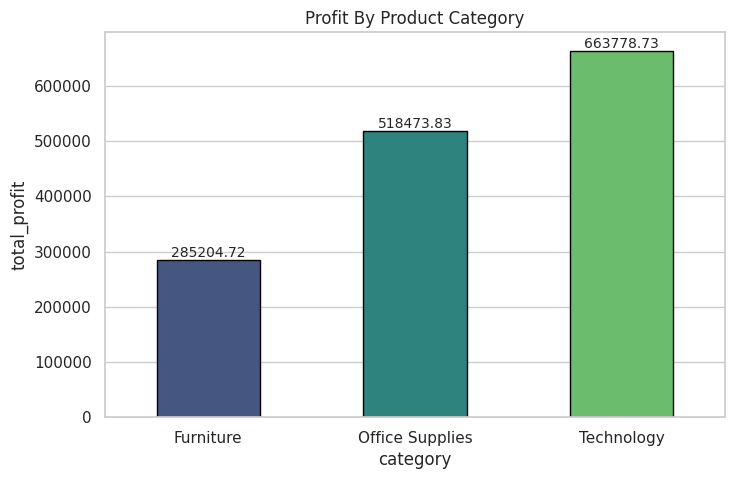

In [170]:
plt.figure(figsize = (8,5))
sbn.barplot(data = category_profit, x = 'category', y = 'total_profit', palette = 'viridis', 
    width = 0.5, edgecolor = 'black', hue = 'category')

for name, num in zip(category_profit['category'], category_profit['total_profit']):
    plt.text(name, num, f"{num}", ha = 'center', va = 'bottom', fontsize = 10)

plt.title('Profit By Product Category')
plt.show()

In [186]:
month_order = data.groupby('month')[['sales', 'profit']].sum().reset_index().round(2)
month_order

,month,sales,profit
0,Apr,698603,73513.63
1,Aug,1293852,151854.11
2,Dec,1580816,170718.13
3,Feb,543768,70932.20
4,Jan,675141,73535.38
5,Jul,749423,78070.09
6,Jun,1269751,147079.42
7,Mar,770519,94087.52
8,May,904061,104509.78
9,Nov,1551319,175449.48


In [213]:
# Rearranging the months accordingly
arranged = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_order['month'] = pd.Categorical(month_order['month'], categories=arranged, ordered=True)
month_order = month_order.sort_values('month')
month_order

,month,sales,profit
4,Jan,675141,73535.38
3,Feb,543768,70932.20
7,Mar,770519,94087.52
0,Apr,698603,73513.63
8,May,904061,104509.78
6,Jun,1269751,147079.42
5,Jul,749423,78070.09
1,Aug,1293852,151854.11
11,Sep,1437432,170438.18
10,Oct,1168220,157269.36


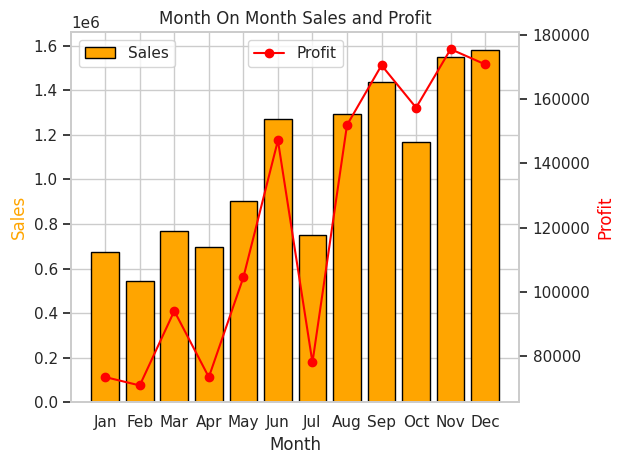

In [222]:
fig, ax1 = plt.subplots()
ax1.bar(month_order['month'], month_order['sales'],  label = 'Sales',
     color = 'orange', edgecolor = 'black')
ax1.set_ylabel('Sales', color = 'orange')
ax1.set_xlabel('Month')
ax1.set_title('Month On Month Sales and Profit')

ax2 = ax1.twinx()
ax2.plot(month_order['month'], month_order['profit'], marker = 'o', 
    label = 'Profit', color = 'red')
ax2.set_ylabel('Profit', color = 'red')

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper center')

plt.tight_layout()
plt.grid(False)
plt.show()

In [224]:
data.head(2)

,category,city,country,customer_name,discount,market_1,order_date,month,order_priority,product_name,...,quantity,region,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,order_year
0,Office Supplies,Los Angeles,United States,Lycoris Saunders,0.0,US,2011-01-07,Jan,High,Xerox 225,...,3,West,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,2011
1,Office Supplies,Los Angeles,United States,Mark Van Huff,0.0,US,2011-01-21,Jan,Medium,"Wirebound Service Call Books, 5 1/2"" x 4""",...,2,West,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,2011


In [228]:
country = data['country'].nunique()
product = data['product_name'].nunique()
print(f"Total Country = {country}\nTotal Product = {product}")

Total Country = 147
Total Product = 3788


In [244]:
products_sales = data.groupby('product_name')['sales'].sum().reset_index(name = 'total_sales').sort_values(
        by = 'total_sales', ascending = False)
# products_sales = products_sales[products_sales['total_sales'] >= 40000]
products_sales

,product_name,total_sales
310,"Apple Smart Phone, Full Size",86936
970,"Cisco Smart Phone, Full Size",76441
2415,"Motorola Smart Phone, Full Size",73159
2501,"Nokia Smart Phone, Full Size",71904
866,Canon imageCLASS 2200 Advanced Copier,61600
...,...,...
3694,Xerox 1989,8
1641,Grip Seal Envelopes,7
3707,Xerox 20,6
373,Avery 5,6


In [250]:
top_20_products = products_sales.head(20)
top_20_products

,product_name,total_sales
310,"Apple Smart Phone, Full Size",86936
970,"Cisco Smart Phone, Full Size",76441
2415,"Motorola Smart Phone, Full Size",73159
2501,"Nokia Smart Phone, Full Size",71904
866,Canon imageCLASS 2200 Advanced Copier,61600
1837,"Hon Executive Leather Armchair, Adjustable",58200
2631,"Office Star Executive Leather Armchair, Adjust...",50667
1714,"Harbour Creations Executive Leather Armchair, ...",50120
2988,"Samsung Smart Phone, Cordless",48654
2502,"Nokia Smart Phone, with Caller ID",47880


In [264]:
# Most ordered products
top_products_percentage_sales = round((sum(top_20_products['total_sales']) / 
    sum(products_sales['total_sales'])) * 100, 2)
print(f"Top products sales percentage = {top_products_percentage_sales}%")

Top products sales percentage = 8.08%


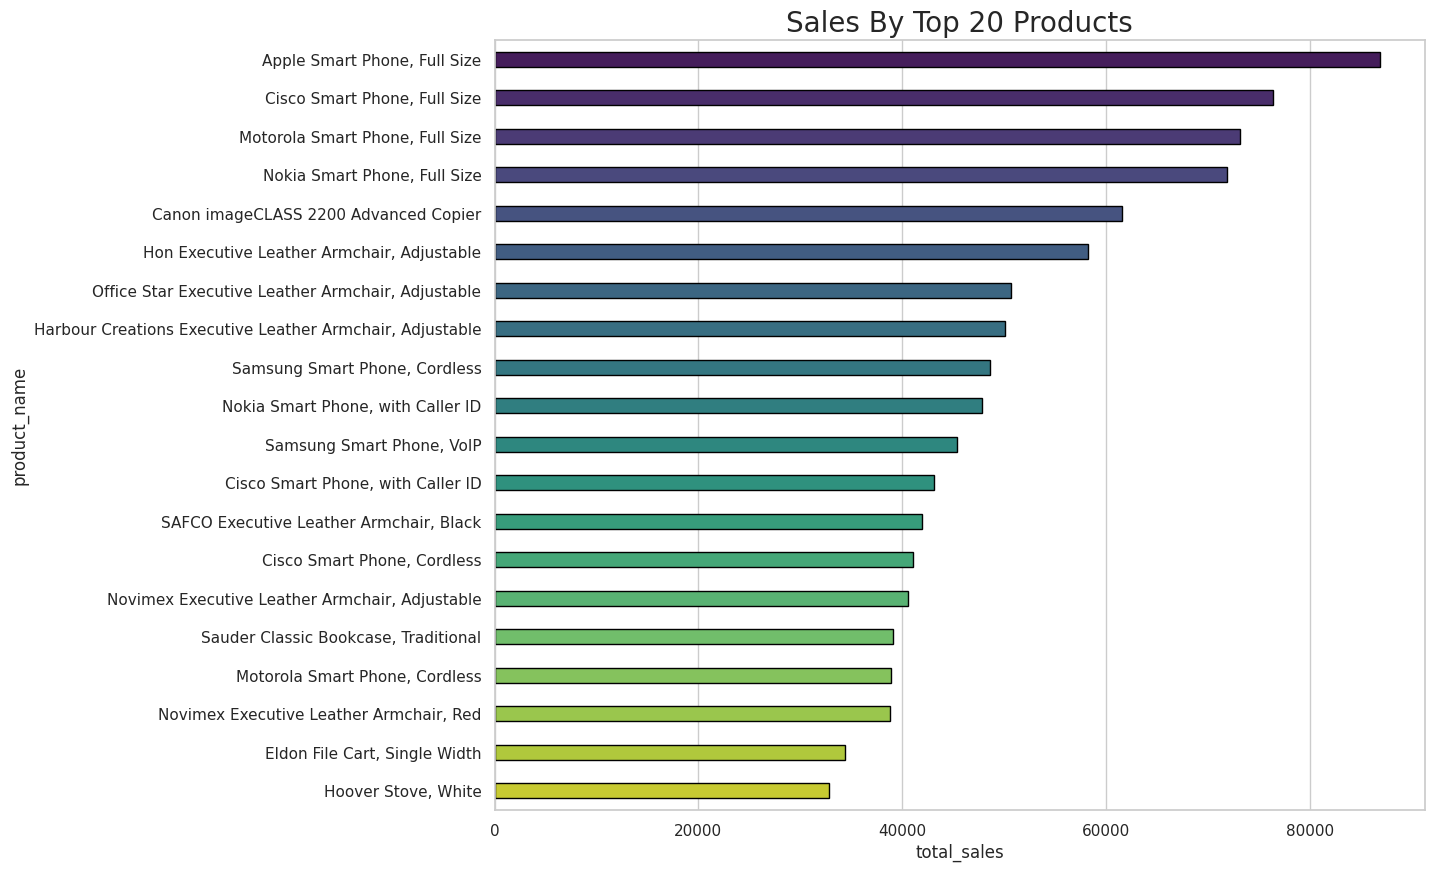

In [364]:
plt.figure(figsize = (12,10))
sbn.barplot(data = top_20_products, x = 'total_sales', y = 'product_name', 
    hue = 'product_name', palette = 'viridis', edgecolor = 'black', width = 0.4)
plt.title('Sales By Top 20 Products', fontsize = 20)
plt.show()

In [286]:
regional_order = data.groupby('region')['sales'].sum().reset_index(name = 'total_sales')
regional_order

,region,total_sales
0,Africa,783776
1,Canada,66932
2,Caribbean,324281
3,Central,2822399
4,Central Asia,752839
5,EMEA,806184
6,East,678834
7,North,1248192
8,North Asia,848349
9,Oceania,1100207


In [292]:
import plotly.express as px

fig = px.choropleth(regional_order, 
                    locations = "region", 
                    locationmode = "country names", 
                    color = "total_sales",
                    title = "Total Sales by Region",
                    color_continuous_scale = "Viridis")

fig.show()

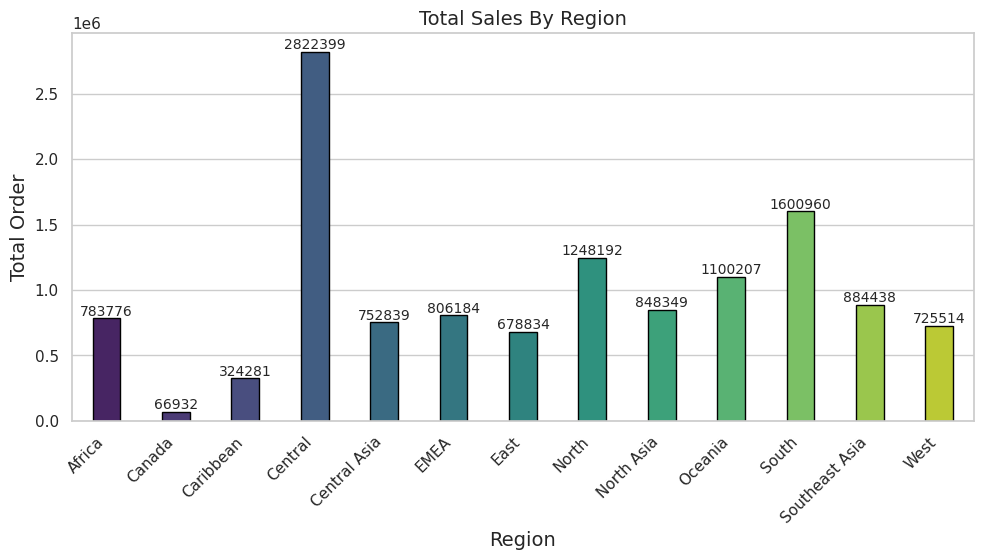

In [362]:
plt.figure(figsize = (10,5))
sbn.barplot(data = regional_order, x = 'region', y = 'total_sales', 
            hue = 'region', palette = 'viridis', edgecolor = 'black', width = 0.4)

for name, value in zip(regional_order['region'], regional_order['total_sales']):
    plt.text(name, value, f"{value}", ha = 'center', va = 'bottom', fontsize = 10)

plt.title('Total Sales By Region', fontsize = 14)
plt.xlabel('Region', fontsize = 14)
plt.ylabel('Total Order', fontsize = 14)
plt.tight_layout()
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [312]:
data.columns

Index(['category', 'city', 'country', 'customer_name', 'discount', 'market_1',
       'order_date', 'month', 'order_priority', 'product_name', 'profit',
       'quantity', 'region', 'sales', 'segment', 'ship_date', 'ship_mode',
       'shipping_cost', 'state', 'sub_category', 'order_year'],
      dtype='object')

In [316]:
ship_mode_sales = data.groupby('ship_mode')['sales'].sum().reset_index(name = 'total_sales')
ship_mode_sales

,ship_mode,total_sales
0,First Class,1831067
1,Same Day,667202
2,Second Class,2565747
3,Standard Class,7578889


In [322]:
fig = px.treemap(data_frame = ship_mode_sales, 
        path = ['ship_mode'], 
        values = 'total_sales', 
        title = 'Total Order By Ship Mode')
fig.show()

In [330]:
segment_sales = data.groupby('segment')['sales'].sum().reset_index(name = 'total_sales')
segment_sales

,segment,total_sales
0,Consumer,6508141
1,Corporate,3824808
2,Home Office,2309956


In [338]:
segment_sales['percentage_sales'] = round(segment_sales['total_sales'] / 
    sum(segment_sales['total_sales']) * 100, 2)
segment_sales

,segment,total_sales,percentage_sales
0,Consumer,6508141,51.48
1,Corporate,3824808,30.25
2,Home Office,2309956,18.27


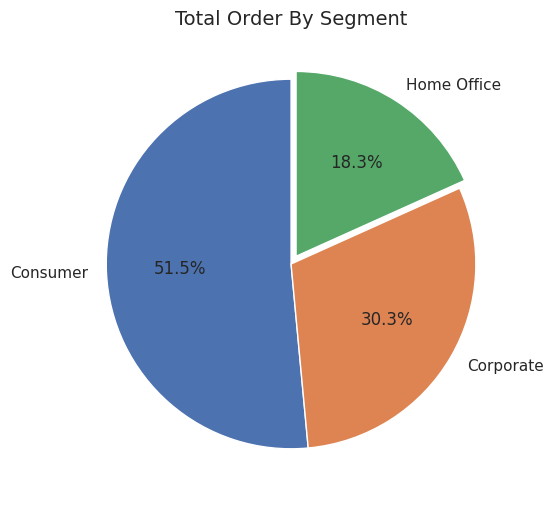

In [355]:
plt.figure(figsize = (10,6))
plt.pie( segment_sales['percentage_sales'], labels = segment_sales['segment'], startangle = 90,
        autopct = '%1.1f%%', explode = [0,0,0.05])
plt.title('Total Order By Segment', fontsize = 14)
plt.show()

In [368]:
correlation = data[['discount', 'profit', 'shipping_cost']]
correlation

,discount,profit,shipping_cost
0,0.0,9.3312,4.37
1,0.0,9.2928,0.94
2,0.0,9.8418,1.81
3,0.0,53.2608,4.59
4,0.0,3.1104,1.32
...,...,...,...
51285,0.2,5.5755,0.97
51286,0.2,5.7150,1.54
51287,0.2,52.7760,12.51
51288,0.2,5.7825,1.19


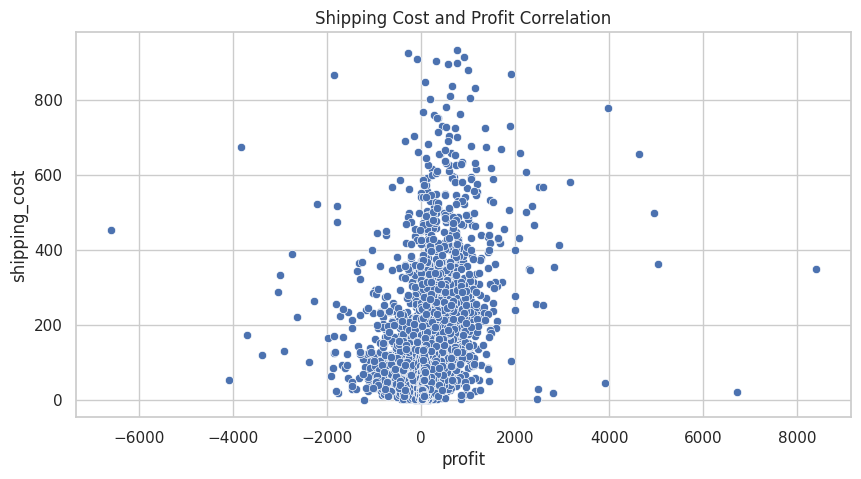

In [382]:
plt.figure(figsize = (10,5))
sbn.scatterplot(data=correlation, x='profit', y='shipping_cost')
plt.title('Shipping Cost and Profit Correlation')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f021e8f8-71e0-42cd-8c7c-b202e6d52729' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>